<a href="https://colab.research.google.com/github/PradnyaTayade/BE_/blob/main/NEWS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 13.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0483faa3b8e336ab808d983c68f8deacac0426cbd823900850da8b4c7e0f884e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
## for data
import pandas as pd
#Collections are used to store, retrieve, manipulate, and communicate aggregate data.
import collections
#JSON is often used to transport and parse big files and Very easy to read, write and manipulate​
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#it is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.​
import wordcloud
# for text processing
# can be used to work with Regular Expressions for text preprocessing.​
import re
import nltk
## for language detection
import langdetect
## for sentiment
from textblob import TextBlob
## for name entity recognition
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

In [ ]:
lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append(json.loads(dic))
## print the first one      
print(lst_dics[:5])

[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9', 'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters', 'category': 'U.S. NEWS', 'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.', 'authors': 'Carla K. Johnson, AP', 'date': '2022-09-23'}, {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe', 'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video', 'category': 'U.S. NEWS', 'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.", 'authors': 'Mary Papenfuss', 'date': '2022-09-23'}, {'link': 'https://www.huffpost.com/en

In [ ]:
S## create dtf
dtf = pd.DataFrame(lst_dics)
## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
## print 5 random rows
dtf.sample(5)

In [ ]:
dtf.shape

(55068, 2)

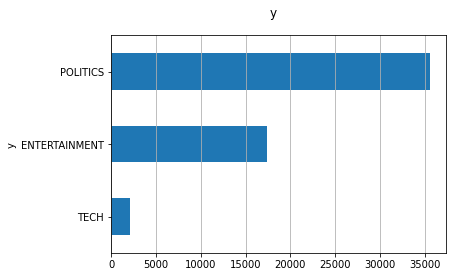

In [ ]:
x = "y"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
txt = dtf["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000  -->  en


In [ ]:
dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
dtf.head()

,y,text,lang
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en


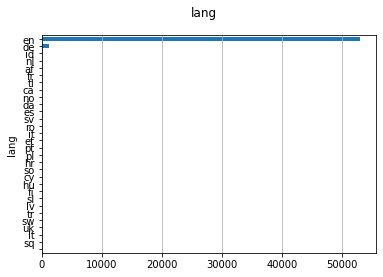

In [ ]:
x = "lang"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
dtf = dtf[dtf["lang"]=="en"]

In [ ]:
print("--- original ---")
print(dtf["text"].iloc[1])
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(dtf["text"].iloc[1]).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- original ---
Golden Globes Returning To NBC In January After Year Off-Air
--- cleaning ---
golden globes returning to nbc in january after year offair
--- tokenization ---
['golden', 'globes', 'returning', 'to', 'nbc', 'in', 'january', 'after', 'year', 'offair']


In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

--- remove stopwords ---
['golden', 'globes', 'returning', 'nbc', 'january', 'year', 'offair']


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['golden', 'globe', 'return', 'nbc', 'januari', 'year', 'offair']
--- lemmatisation ---
['golden', 'globe', 'returning', 'nbc', 'january', 'year', 'offair']


In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, lst_stopwords=None, flg_stemm=False, flg_lemm=True):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
dtf["text_clean"] = dtf["text"].apply(lambda x: utils_preprocess_text(x, lst_stopwords, flg_stemm=False, flg_lemm=True))

In [ ]:
dtf.head()

,y,text,lang,text_clean
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release


In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000  -->  twitch ban gambling site streamer scam folk 200000


In [ ]:
dtf['word_count'] = dtf["text"].apply(lambda x: len(str(x).split(" ")))
dtf['char_count'] = dtf["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dtf['sentence_count'] = dtf["text"].apply(lambda x: len(str(x).split(".")))
dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

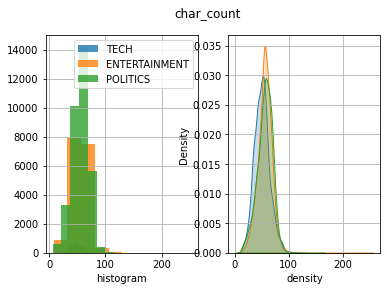

In [ ]:
x, y = "char_count", "y"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

Polarity score in the range of -1 to -0.5 typically indicates negative sentiment.
Polarity score greater than -0.5 and less than +0.5 typically indicates neutral sentiment.
Polarity score in the range of +0.5 to 1 typically indicates positive sentiment.

In [ ]:
dtf["sentiment"] = dtf["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000,0.0000
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000,0.3000
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333,0.0000
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000,0.1125
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000,0.0000


In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000  -->  0.0


In [ ]:
pip install Spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 (' En_core_web_lg ')?

Spacy is an advanced natural language library for text processing in python. Using it you can easily find the context of the text therefore very helpful for extracting meaningful information from the text. As the text can be of different languages and spacy is trained according to that.

In [ ]:
import spacy.cli ## common line interface
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
## call model
import spacy
ner = spacy.load("en_core_web_lg")
## tag text
txt = dtf["text"].iloc[3]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">‘\n<mark class="entity" style="background: #f0d0ff; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Beautiful And Sad At The Same Time’:\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">WORK_OF_ART</span>\n</mark>\n \n<mark class="entity" style="background: #ffeb80; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Ukrainian Cultural Festival Takes\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">EVENT</span>\n</mark>\n On \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    A Deeper Meaning\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vert

In [ ]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,...,tags_LANGUAGE,tags_DATE,tags_ORDINAL,tags_TIME,tags_LOC,tags_NORP,tags_CARDINAL,tags_ORG,tags_FAC,tags_WORK_OF_ART
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000,0.3000,...,0,1,0,0,0,0,0,0,0,1
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333,0.0000,...,0,0,0,0,0,0,0,1,0,0
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000,0.1125,...,0,1,0,0,0,0,0,0,0,1
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000,0.0000,...,0,0,0,0,0,0,0,1,0,0


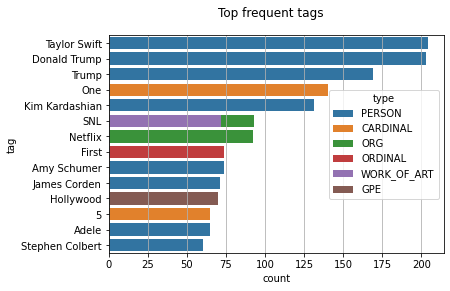

In [ ]:
y = "ENTERTAINMENT"
 
tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:15,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [ ]:
## predict wit NER
txt = dtf["text"].iloc[0]
print(txt)
entities = ner(txt).ents
print(entities)
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000
(Twitch Bans, 200,000)
Twitch_Bans Gambling Sites After Streamer Scams Folks Out Of $200,000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


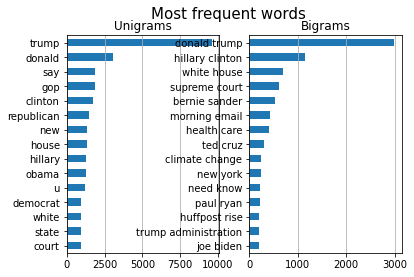

In [ ]:
 nltk.download('punkt')
y = "POLITICS"
corpus = dtf[dtf["y"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:15,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:15,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
lst_words = ["box office", "republican", "apple"]
## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(dtf["text_clean"]).todense(), columns=lst_words)
## add the new features as columns
dtf = pd.concat([dtf, dtf_X.set_index(dtf.index)], axis=1)
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,...,tags_TIME,tags_LOC,tags_NORP,tags_CARDINAL,tags_ORG,tags_FAC,tags_WORK_OF_ART,box office,republican,apple
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000,0.3000,...,0,0,0,0,0,0,1,0,0,0
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333,0.0000,...,0,0,0,0,1,0,0,0,0,0
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000,0.1125,...,0,0,0,0,0,0,1,0,0,0
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000,0.0000,...,0,0,0,0,1,0,0,0,0,0


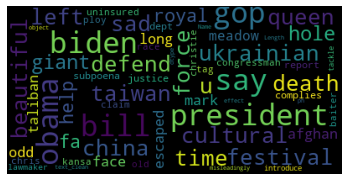

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
word = "love"
nlp[word]

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31

In [ ]:
nlp[word].shape

(300,)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(5, 2, 'love')

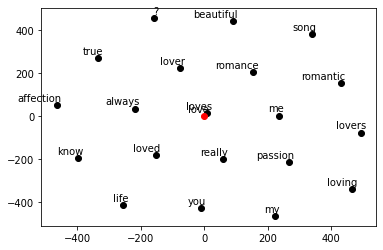

In [ ]:
## find closest vectors
labels, X, x, y = [], [], [], []
for t in nlp.most_similar(word, topn=20):
    X.append(nlp[t[0]])
    labels.append(t[0])
## reduce dimensions
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
new_values = pca.fit_transform(X)
for value in new_values:
    x.append(value[0])
    y.append(value[1])
## plot
fig = plt.figure()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="black")
    plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')
## add center
plt.scatter(x=0, y=0, c="red")
plt.annotate(word, xy=(0,0), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

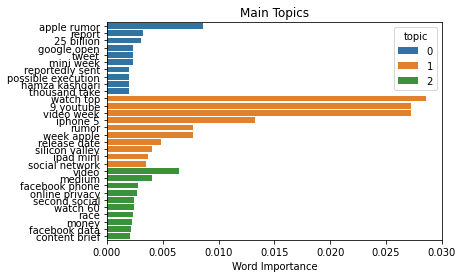

In [ ]:
y = "TECH"
corpus = dtf[dtf["y"]==y]["text_clean"]

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()